In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

#### Alexnet

In [2]:
zvc_al=pd.read_csv('results/ZVC-alexnet.csv')

zrle_al=pd.read_csv('results/zero_RLE-alexnet.csv')

grle_al=pd.read_csv('results/GRLE-alexnet.csv')

#### ResNet34

In [5]:
zvc_rs=pd.read_csv('results/ZVC-resnet34.csv')

zrle_rs=pd.read_csv('results/zero_RLE-resnet34.csv')

grle_rs=pd.read_csv('results/GRLE-resnet34.csv')

#### VGG16

In [8]:
zvc_vg=pd.read_csv('results/ZVC-vgg16.csv')

zrle_vg=pd.read_csv('results/zero_RLE-vgg16.csv')

grle_vg=pd.read_csv('results/GRLE-vgg16.csv')

#### Mobilenet2

In [11]:
zvc_mb2=pd.read_csv('results/ZVC-mobilenet2.csv')

zrle_mb2=pd.read_csv('results/zero_RLE-mobilenet2.csv')

grle_mb2=pd.read_csv('results/GRLE-mobilenet2.csv')

#### Squeezenet

In [14]:
zvc_sq=pd.read_csv('results/ZVC-squeezenet.csv')

zrle_sq=pd.read_csv('results/zero_RLE-squeezenet.csv')

grle_sq=pd.read_csv('results/GRLE-squeezenet.csv')

In [17]:
# 1) per model per comression method find avg compression ratio- sum all actual size / sum all compressed
# 2) plot model vs avg compression ratio for each compression on same plot

##### per model per comression method find avg compression ratio

In [18]:
avg_comp=[] #Avg model compression Ratio
sp=[] #Avg model sparsity

In [19]:
al=[]

al.append(zvc_al['Actual Size'].sum()/zvc_al['Compressed Size'].sum())

al.append(zrle_al['Actual Size'].sum()/zrle_al['Compressed Size'].sum())

al.append(grle_al['Actual Size'].sum()/grle_al['Compressed Size'].sum())

sp.append(zvc_al['Sparsity'].mean())

avg_comp.append(al)

In [20]:
rs=[]

rs.append(zvc_rs['Actual Size'].sum()/zvc_rs['Compressed Size'].sum())

rs.append(zrle_rs['Actual Size'].sum()/zrle_rs['Compressed Size'].sum())

rs.append(grle_rs['Actual Size'].sum()/grle_rs['Compressed Size'].sum())

sp.append(zvc_rs['Sparsity'].mean())

avg_comp.append(rs)

In [21]:
vg=[]

vg.append(zvc_vg['Actual Size'].sum()/zvc_vg['Compressed Size'].sum())

vg.append(zrle_vg['Actual Size'].sum()/zrle_vg['Compressed Size'].sum())

vg.append(grle_vg['Actual Size'].sum()/grle_vg['Compressed Size'].sum())

sp.append(zvc_vg['Sparsity'].mean())

avg_comp.append(vg)

In [22]:
mb2=[]

mb2.append(zvc_mb2['Actual Size'].sum()/zvc_mb2['Compressed Size'].sum())

mb2.append(zrle_mb2['Actual Size'].sum()/zrle_mb2['Compressed Size'].sum())

mb2.append(grle_mb2['Actual Size'].sum()/grle_mb2['Compressed Size'].sum())

sp.append(zvc_mb2['Sparsity'].mean())

avg_comp.append(mb2)

In [23]:
sq=[]

sq.append(zvc_sq['Actual Size'].sum()/zvc_sq['Compressed Size'].sum())

sq.append(zrle_sq['Actual Size'].sum()/zrle_sq['Compressed Size'].sum())

sq.append(grle_sq['Actual Size'].sum()/grle_sq['Compressed Size'].sum())

sp.append(zvc_sq['Sparsity'].mean())

avg_comp.append(sq)

##### plot model vs avg compression ratio for each compression on same plot

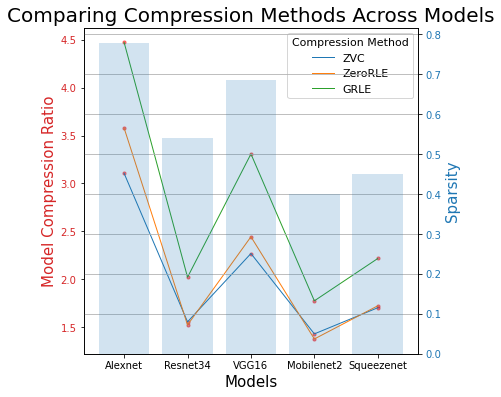

In [26]:
comp=['ZVC','ZeroRLE','GRLE']
models=['Alexnet','Resnet34','VGG16','Mobilenet2','Squeezenet']
color1 = 'tab:red'
color2 = 'tab:blue'
ar=np.array(avg_comp)
fig, ax1 = plt.subplots(figsize = (6, 6))
plt.title("Comparing Compression Methods Across Models",fontsize=20)
for p in range(ar.shape[1]):
    ax1.plot(models,ar[:,p],label=comp[p],lw=1,alpha=1)
    ax1.scatter(models,ar[:,p],color='r',s=10,alpha=0.5)

plt.legend(title="Compression Method",title_fontsize=11,fontsize=11)
ax1.set_xlabel("Models",fontsize=20)
ax1.set_ylabel("Model Compression Ratio",fontsize=15,color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(models, sp,alpha=0.2)
ax2.set_ylabel('Sparsity',fontsize=15,color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax1.set_xlabel("Models",fontsize=15) 
plt.grid(True)
plt.savefig('figs/compress_compare_across_models.jpg', bbox_inches='tight', pad_inches=0.0)